In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

#### Q 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [2]:
df = pd.read_excel('Election_Data.xlsx', sheet_name='Election_Dataset_Two Classes')

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
# Drop unwanted column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [6]:
df.rename(columns={'economic.cond.national':'economic_cond_national', 'economic.cond.household': 'economic_cond_household'}, inplace=True)

In [7]:
df.head()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [8]:
df.shape

(1525, 9)

In [9]:
df.dtypes

vote                       object
age                         int64
economic_cond_national      int64
economic_cond_household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [10]:
df.isnull().sum()

vote                       0
age                        0
economic_cond_national     0
economic_cond_household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic_cond_national   1525 non-null   int64 
 3   economic_cond_household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [12]:
len(df[df.duplicated()])

8

In [13]:
df.drop_duplicates(keep="first", inplace=True)

In [14]:
len(df[df.duplicated()])

0

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic_cond_national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic_cond_household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


In [16]:
df.describe(include = 'object').T

,count,unique,top,freq
vote,1517,2,Labour,1057
gender,1517,2,female,808


#### Q 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. 

In [17]:
df.skew(axis = 0, skipna = True)

C:\Users\91906\AppData\Local\Temp/ipykernel_13936/2838370498.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis = 0, skipna = True)


age                        0.139800
economic_cond_national    -0.238474
economic_cond_household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

In [18]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

7

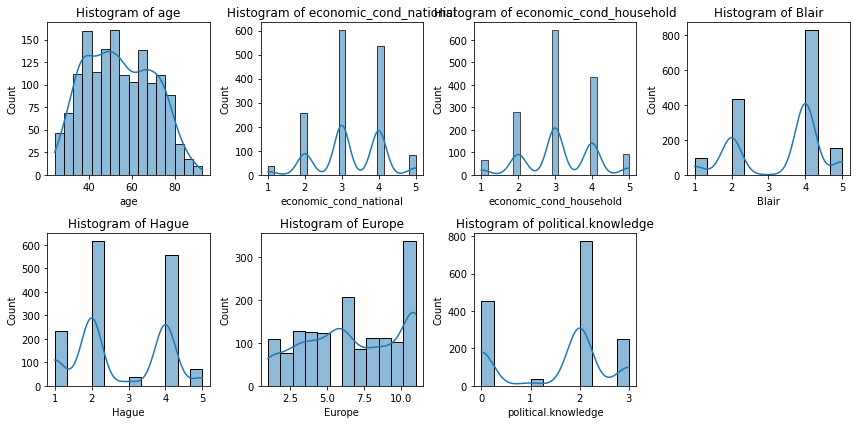

In [19]:
plt.figure(figsize = (12,6))
for i in range(len(lstnumericcolumns)):
    plt.subplot(2, 4, i + 1)
    sns.histplot(x = df[lstnumericcolumns[i]], data = df, kde=True)
    plt.title('Histogram of {}'.format(lstnumericcolumns[i]))
    plt.tight_layout()

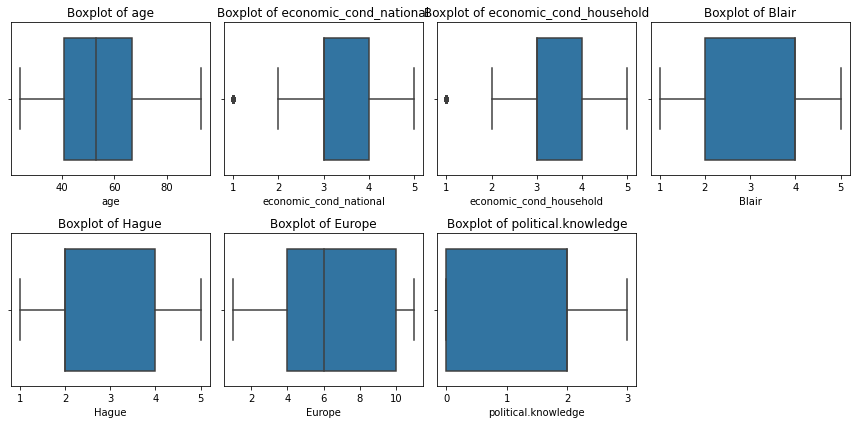

In [20]:
plt.figure(figsize = (12,6))
for i in range(len(lstnumericcolumns)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x = df[lstnumericcolumns[i]], data = df)
    plt.title('Boxplot of {}'.format(lstnumericcolumns[i]))
    plt.tight_layout()

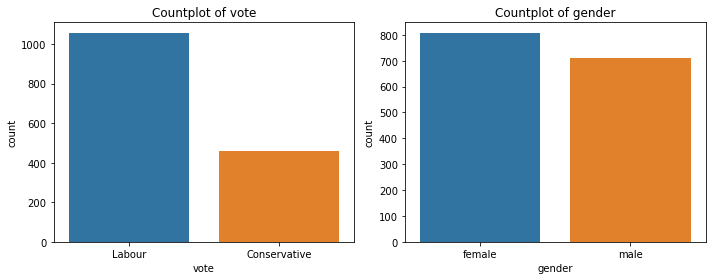

In [21]:
plt.figure(figsize = (10,4))
object_columns = ['vote','gender']
for i in range(len(object_columns)):
    plt.subplot(1, 2, i + 1)
    sns.countplot(x = df[object_columns[i]], data = df)
    plt.title('Countplot of {}'.format(object_columns[i]))
    plt.tight_layout()

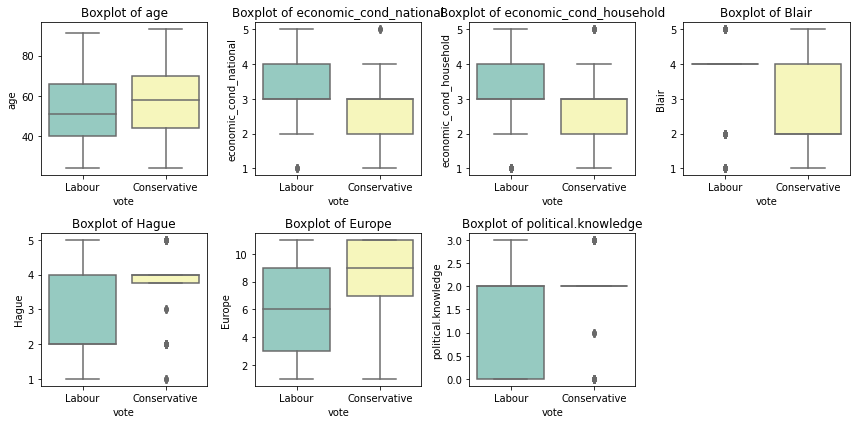

In [22]:
plt.figure(figsize = (12,6))
for i in range(len(lstnumericcolumns)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y = df[lstnumericcolumns[i]], data = df, x='vote', palette='Set3')
    plt.title('Boxplot of {}'.format(lstnumericcolumns[i]))
    plt.tight_layout()

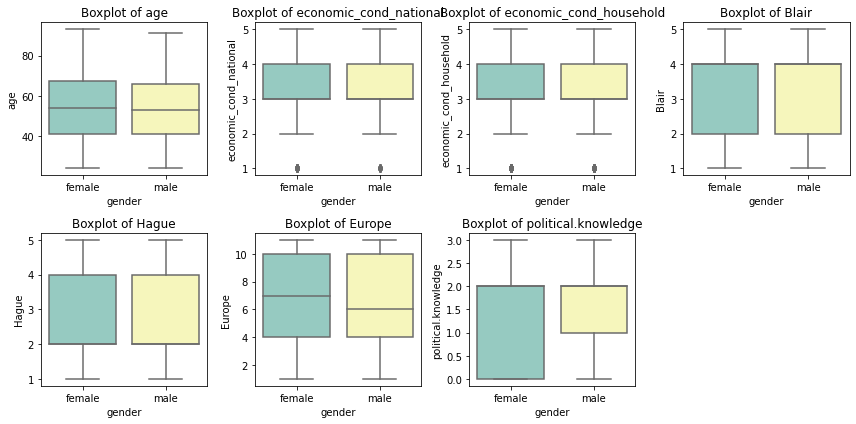

In [23]:
plt.figure(figsize = (12,6))
for i in range(len(lstnumericcolumns)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y = df[lstnumericcolumns[i]], data = df, x='gender', palette='Set3')
    plt.title('Boxplot of {}'.format(lstnumericcolumns[i]))
    plt.tight_layout()

Text(0.5, 1.0, 'Bi-Variate Analysis of Vote & Gender')

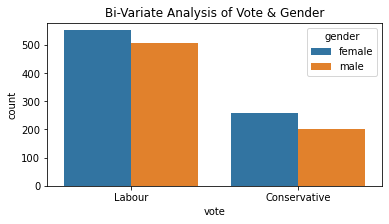

In [24]:
plt.figure(figsize = (6,3))
sns.countplot(data = df, x = df['vote'], hue='gender')
plt.title('Bi-Variate Analysis of Vote & Gender')

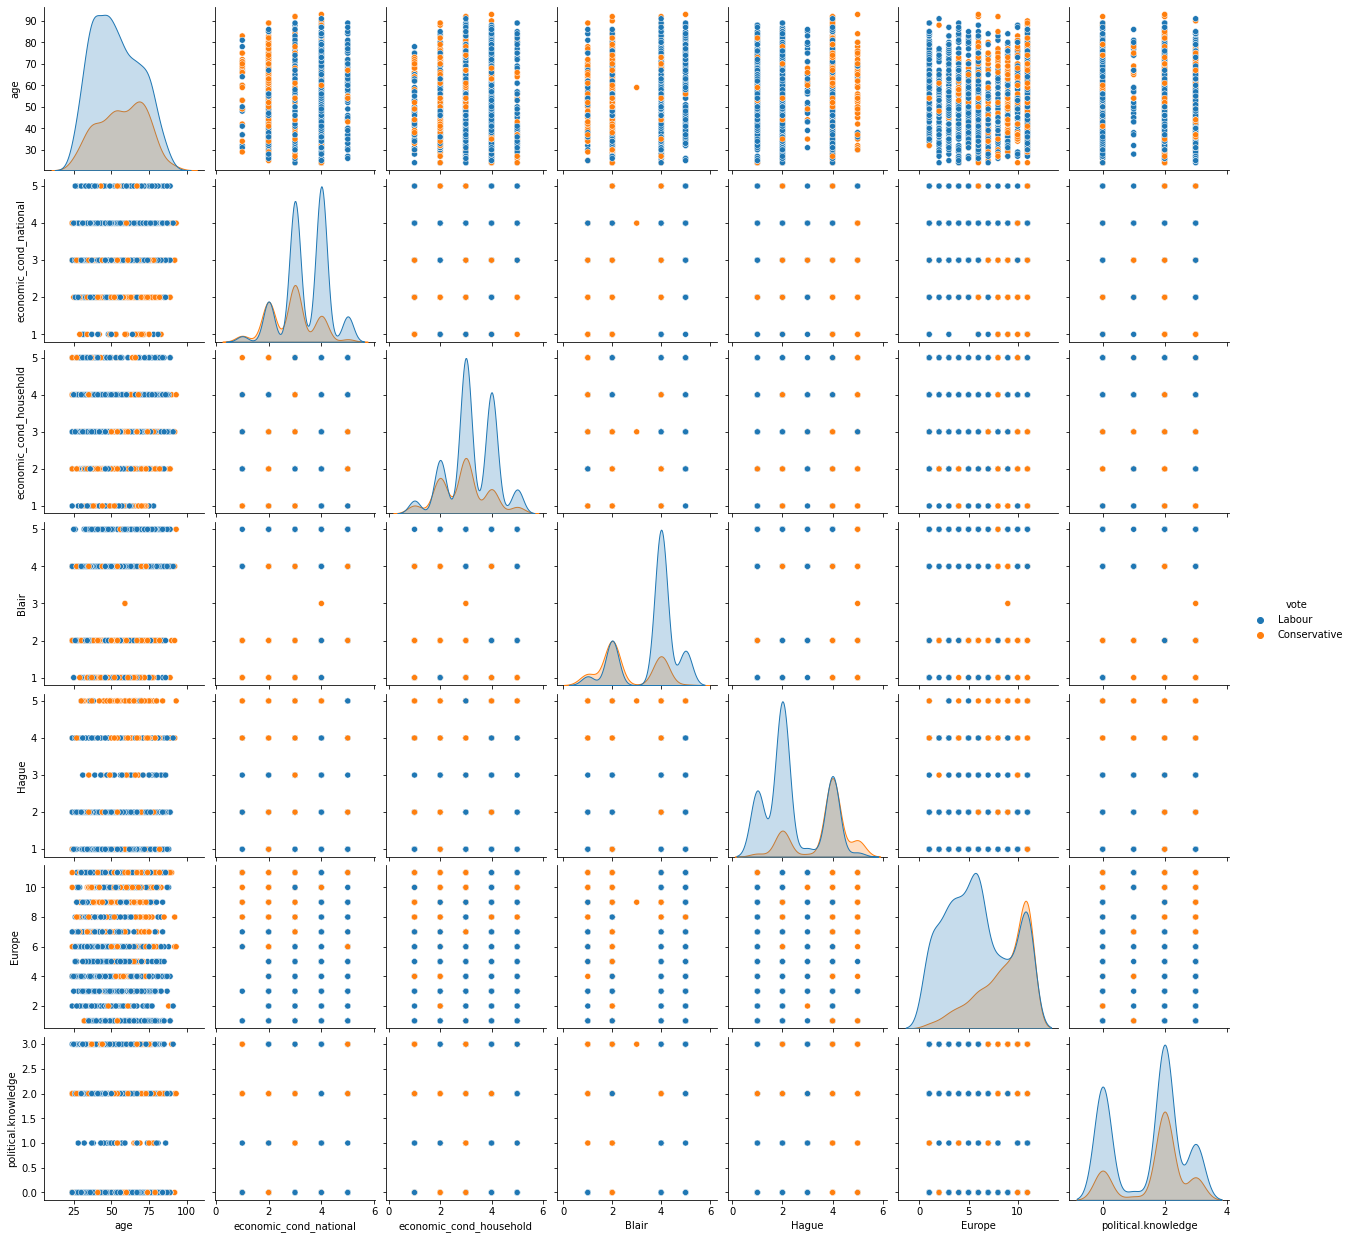

In [25]:
sns.pairplot(data=df, hue='vote')

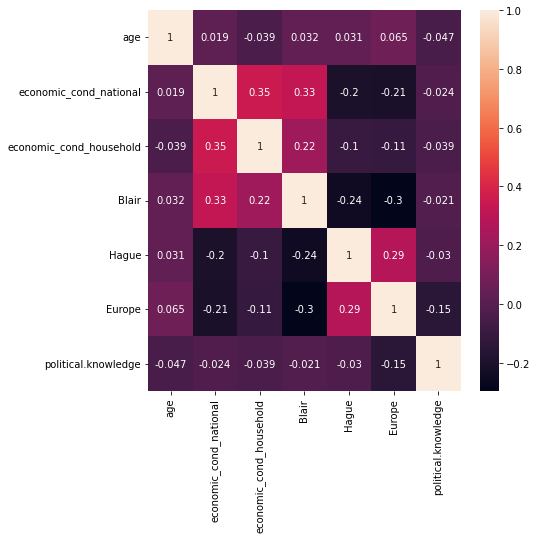

In [26]:
cor = df.corr()
plt.figure(figsize=(7, 7))
sns.heatmap(cor,annot = True);

In [27]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [28]:
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

C:\Users\91906\AppData\Local\Temp/ipykernel_13936/156222215.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


Blair                       0
Europe                      0
Hague                       0
age                         0
economic_cond_household    65
economic_cond_national     37
gender                      0
political.knowledge         0
vote                        0
dtype: int64

In [29]:
df.vote.value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

#### Q 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [30]:
from scipy.stats import zscore
df_scaled = df[lstnumericcolumns].apply(zscore)

In [31]:
df_scaled.describe()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political.knowledge
count,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03
mean,1.917458e-17,-1.984789e-16,-2.397189e-16,-1.034842e-16,5.386448e-17,6.293947e-17,-7.665442e-16
std,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00
min,-1.926617e+00,-2.547041e+00,-2.296796e+00,-1.988727e+00,-1.419969e+00,-1.740556e+00,-1.421084e+00
25%,-8.435773e-01,-2.781853e-01,-1.480205e-01,-1.137217e+00,-6.083289e-01,-8.309016e-01,-1.421084e+00
50%,-7.907881e-02,-2.781853e-01,-1.480205e-01,5.658022e-01,-6.083289e-01,-2.244654e-01,4.238322e-01
75%,8.128361e-01,8.562424e-01,9.263674e-01,5.658022e-01,1.014951e+00,9.884072e-01,4.238322e-01
max,2.469250e+00,1.990670e+00,2.000755e+00,1.417312e+00,1.826592e+00,1.291625e+00,1.346290e+00


In [32]:
df_scaled =  df_scaled.join(df['vote'])
df_scaled =  df_scaled.join(df['gender'])

In [33]:
df_scaled.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political.knowledge,vote,gender
0,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,Labour,female
1,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,Labour,male
2,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,Labour,male
3,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,Labour,female
4,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,Labour,male


In [34]:
df_scaled_not_encoded = df_scaled.copy()

In [35]:
for feature in df_scaled.columns: 
    if df_scaled[feature].dtype == 'object': 
        print('\n')
        print('Column:',feature)
        print(pd.Categorical(df_scaled[feature].unique()))
        print(pd.Categorical(df_scaled[feature].unique()).codes)
        df_scaled[feature] = pd.Categorical(df_scaled[feature]).codes



Column: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


Column: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [36]:
X = df_scaled.drop('vote', axis=1)
y = df_scaled.pop('vote')

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

#### Q 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

In [38]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train, y_train)
lr_model

LogisticRegression()

In [39]:
lr_model_score_test = lr_model.score(X_test, y_test)
print("Test data LR Model Score: ",lr_model_score_test)

lr_model_score_train = lr_model.score(X_train, y_train)
print("Train data LR Model Score: ",lr_model_score_train)

Test data LR Model Score:  0.8333333333333334
Train data LR Model Score:  0.8312912346842601


In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ld_model = LinearDiscriminantAnalysis()
ld_model = ld_model.fit(X_train,y_train)
ld_model

LinearDiscriminantAnalysis()

In [41]:
ld_model_score_test = ld_model.score(X_test, y_test)
print("Test data LD Model Score: ",ld_model_score_test)

ld_model_score_train = ld_model.score(X_train, y_train)
print("Train data LD Model Score: ",ld_model_score_train)

Test data LD Model Score:  0.8333333333333334
Train data LD Model Score:  0.8341187558906692


#### Q 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
knn = knn.fit(X_train, y_train)
knn

KNeighborsClassifier(weights='distance')

In [43]:
knn_model_score_test = knn.score(X_test, y_test)
print("Test data KNN Model Score: ",knn_model_score_test)

knn_model_score_train = knn.score(X_train, y_train)
print("Train data KNN Model Score: ",knn_model_score_train)

Test data KNN Model Score:  0.8245614035087719
Train data KNN Model Score:  1.0


In [44]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train.ravel())
gnb

GaussianNB()

In [45]:
y_train_predict = gnb.predict(X_train)
y_test_predict =  gnb.predict(X_test)

from sklearn import metrics

print("Train data GNB model Score: ",metrics.accuracy_score(y_train, y_train_predict))

print("Test data GNB model Score: ",metrics.accuracy_score(y_test, y_test_predict))

Train data GNB model Score:  0.8350612629594723
Test data GNB model Score:  0.8223684210526315


#### Q 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestClassifier


In [47]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [2,4,6],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [10, 20], 
    'min_samples_split': [5,15],
    'n_estimators': [50, 150]
}

rf_model = RandomForestClassifier(random_state=1)

grid_search_dt = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 3)

grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 4, 6],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [5, 15],
                         'n_estimators': [50, 150]})

In [48]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 50}

In [49]:
randomForest = grid_search_dt.best_estimator_

In [50]:
print("RF Model Score for Train Data: ",randomForest.score(X_train,y_train))
print("RF Model Score for Test Data: ",randomForest.score(X_test,y_test))

RF Model Score for Train Data:  0.8586239396795476
RF Model Score for Test Data:  0.8245614035087719


In [51]:
bgcl = BaggingClassifier(base_estimator=randomForest, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

In [52]:
print("RF Model with Bagging Score for Train Data: ",bgcl.score(X_train,y_train))
print("RF Model with Bagging Score for Test Data: ",bgcl.score(X_test,y_test))

RF Model with Bagging Score for Train Data:  0.8567389255419415
RF Model with Bagging Score for Test Data:  0.8223684210526315


In [53]:
abcl = AdaBoostClassifier(base_estimator=randomForest, n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

In [54]:
print("RF Model with Ada Boosting Score for Train Data: ",abcl.score(X_train,y_train))
print("RF Model with Ada Boosting Score for Test Data: ",abcl.score(X_test,y_test))

RF Model with Ada Boosting Score for Train Data:  1.0
RF Model with Ada Boosting Score for Test Data:  0.8135964912280702


In [55]:
gbcl = GradientBoostingClassifier( n_estimators=50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [56]:
print("RF Model with Ada Boosting Score for Train Data: ",gbcl.score(X_train,y_train))
print("RF Model with Ada Boosting Score for Test Data: ",gbcl.score(X_test,y_test))

RF Model with Ada Boosting Score for Train Data:  0.8803016022620169
RF Model with Ada Boosting Score for Test Data:  0.8289473684210527


#### Q 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
ytrain_predict_rf = randomForest.predict(X_train)
ytest_predict_rf = randomForest.predict(X_test)

In [59]:
confusion_matrix(y_train, ytrain_predict_rf)

array([[210,  97],
       [ 53, 701]], dtype=int64)

In [60]:
confusion_matrix(y_test, ytest_predict_rf)

array([[101,  52],
       [ 28, 275]], dtype=int64)

In [61]:
ytrain_predict_bag = bgcl.predict(X_train)
ytest_predict_bag = bgcl.predict(X_test)

In [62]:
confusion_matrix(y_train, ytrain_predict_bag)

array([[207, 100],
       [ 52, 702]], dtype=int64)

In [63]:
confusion_matrix(y_test, ytest_predict_bag)

array([[ 99,  54],
       [ 27, 276]], dtype=int64)

In [64]:
ytrain_predict_abcl = abcl.predict(X_train)
ytest_predict_abcl = abcl.predict(X_test)

In [65]:
confusion_matrix(y_train, ytrain_predict_abcl)

array([[307,   0],
       [  0, 754]], dtype=int64)

In [66]:
confusion_matrix(y_test, ytest_predict_abcl)

array([[105,  48],
       [ 37, 266]], dtype=int64)

In [67]:
ytrain_predict_gbcl = gbcl.predict(X_train)
ytest_predict_gbcl = gbcl.predict(X_test)

In [68]:
confusion_matrix(y_train, ytrain_predict_gbcl)

array([[226,  81],
       [ 46, 708]], dtype=int64)

In [69]:
confusion_matrix(y_test, ytest_predict_gbcl)

array([[103,  50],
       [ 28, 275]], dtype=int64)

In [70]:
print(classification_report(y_train, ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.80      0.68      0.74       307
           1       0.88      0.93      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.81      0.82      1061
weighted avg       0.86      0.86      0.86      1061



In [71]:
print(classification_report(y_test, ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.78      0.66      0.72       153
           1       0.84      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



In [72]:
print(classification_report(y_train, ytrain_predict_bag))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73       307
           1       0.88      0.93      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.80      0.82      1061
weighted avg       0.85      0.86      0.85      1061



In [73]:
print(classification_report(y_test, ytest_predict_bag))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71       153
           1       0.84      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



In [74]:
print(classification_report(y_train, ytrain_predict_abcl))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [75]:
print(classification_report(y_test, ytest_predict_abcl))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71       153
           1       0.85      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



In [76]:
print(classification_report(y_train, ytrain_predict_gbcl))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       307
           1       0.90      0.94      0.92       754

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.88      0.88      0.88      1061



In [77]:
print(classification_report(y_test, ytest_predict_gbcl))

              precision    recall  f1-score   support

           0       0.79      0.67      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

AUC: 0.926


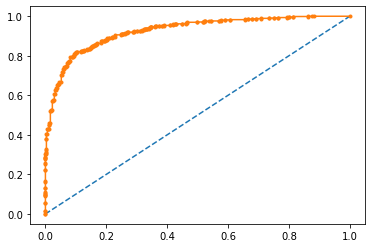

In [79]:
probs = randomForest.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.890


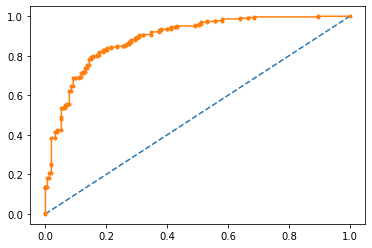

In [80]:
probs = randomForest.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.916


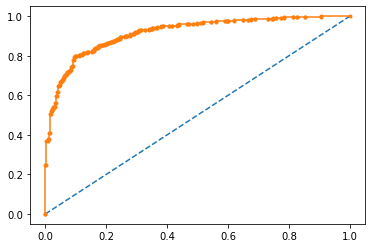

In [81]:
probs = bgcl.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.891


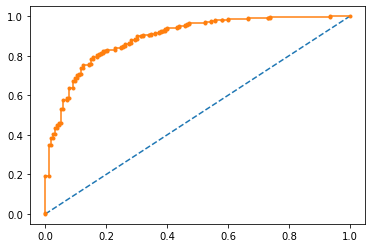

In [82]:
probs = bgcl.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 1.000


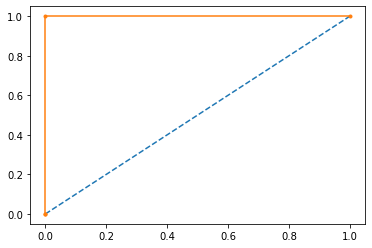

In [83]:
probs = abcl.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.892


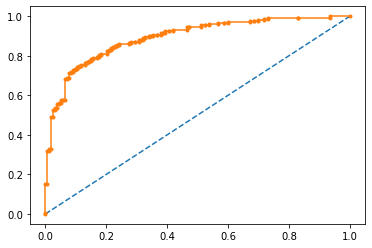

In [84]:
probs = abcl.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.935


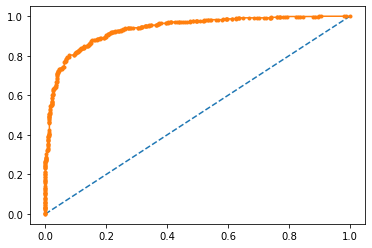

In [85]:
probs = gbcl.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.897


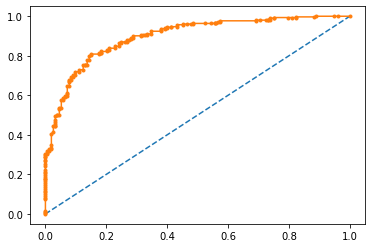

In [86]:
probs = gbcl.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Problem - 2

In [87]:
import nltk
from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer

In [88]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\91906\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

#### Q 2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [89]:
index = ['Roosevelt','Kennedy','Nixon']
inaugural_speech=pd.DataFrame({'president':['Roosevelt - 1941','Kennedy - 1961','Nixon - 1973'],
                               'text':[inaugural.raw('1941-Roosevelt.txt'),
                                       inaugural.raw('1961-Kennedy.txt'),
                                       inaugural.raw('1973-Nixon.txt')]},index=index)

In [90]:
inaugural_speech['char_count'] = inaugural_speech['text'].str.len() ## this also includes spaces
inaugural_speech

,president,text,char_count
Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,7571
Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618
Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991


In [91]:
inaugural_speech['word_count'] = inaugural_speech['text'].apply(lambda x: len(str(x).split(" ")))
inaugural_speech

,president,text,char_count,word_count
Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,7571,1323
Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1364
Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1769


In [92]:
from nltk.tokenize import sent_tokenize
inaugural_speech['sents_count'] = inaugural_speech['text'].apply(lambda x: len(sent_tokenize(x)))
inaugural_speech

,president,text,char_count,word_count,sents_count
Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,7571,1323,68
Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1364,52
Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1769,68


#### Q2.2 Remove all the stopwords from the three speeches

In [93]:
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
inaugural_speech['text']

Roosevelt    on each national day of inauguration since 178...
Kennedy      vice president johnson, mr. speaker, mr. chief...
Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: text, dtype: object

In [94]:
inaugural_speech['count_before'] = inaugural_speech['text'].apply(lambda x: len(x.split(" ")))
inaugural_speech

,president,text,char_count,word_count,sents_count,count_before
Roosevelt,Roosevelt - 1941,on each national day of inauguration since 178...,7571,1323,68,1360
Kennedy,Kennedy - 1961,"vice president johnson, mr. speaker, mr. chief...",7618,1364,52,1390
Nixon,Nixon - 1973,"mr. vice president, mr. speaker, mr. chief jus...",9991,1769,68,1819


In [95]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91906\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [96]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91906\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [97]:
import string
stopwords=nltk.corpus.stopwords.words('english')+list(string.punctuation)
stopwords.append('--')

In [98]:
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
inaugural_speech['count_after'] = inaugural_speech['text'].apply(lambda x: len(x.split(" ")))
inaugural_speech

,president,text,char_count,word_count,sents_count,count_before,count_after
Roosevelt,Roosevelt - 1941,"national day inauguration since 1789, people r...",7571,1323,68,1360,644
Kennedy,Kennedy - 1961,"vice president johnson, mr. speaker, mr. chief...",7618,1364,52,1390,706
Nixon,Nixon - 1973,"mr. vice president, mr. speaker, mr. chief jus...",9991,1769,68,1819,844


#### Q 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [99]:
freq = pd.Series(' '.join(inaugural_speech.iloc[0:1,1]).split()).value_counts()[:3]
freq

know    9
us      8
life    6
dtype: int64

In [100]:
freq = pd.Series(' '.join(inaugural_speech.iloc[1:2,1]).split()).value_counts()[:3]
freq

let    16
us     11
new     7
dtype: int64

In [101]:
freq = pd.Series(' '.join(inaugural_speech.iloc[2:3,1]).split()).value_counts()[:3]
freq

us     25
let    22
new    15
dtype: int64

#### Q 2.4 Plot the word cloud of each of the three speeches. (after removing the stopwords)

## Facing some issues to install word cloud. So executed same code on Pycharm and added figures to report.

from wordcloud import WordCloud,STOPWORDS
words = ' '.join(df.iloc[1:2,2])
wordcloud = WordCloud(
                      background_color='black',
                      min_font_size = 10, random_state=100,
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

words = ' '.join(df.iloc[1:2,2])
wordcloud = WordCloud(
                      background_color='black',
                      min_font_size = 10, random_state=100,
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

words = ' '.join(df.iloc[2:3,2])
wordcloud = WordCloud(
                      background_color='black',
                      min_font_size = 10, random_state=100,
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()